# Running and Intrepreting the output of Drain

### Running Drain
To run drain the syntax is:

drain --outputdir *output directory* epa.model.steps::violations

That will run a standard random forest on predicting violations. 
The epa.model.steps is the file where the different model running options are located.

In [2]:
# First copy epotash's virtuan env. We need python2 to run drain
!cp -r /mnt/data/nysdec/epotash/epa_env/ .


:/home/dmagee


In [1]:

! drain --outputdir /mnt/data/nysdec/epa-ny/drain/ epa.model.steps::violations


epa.model.steps::violations
Traceback (most recent call last):
  File "/home/dmagee/drain/bin/to_drakefile.py", line 36, in <module>
    mod = importlib.import_module(modulename)
  File "/home/dmagee/nys_env/lib/python3.4/importlib/__init__.py", line 109, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 2254, in _gcd_import
  File "<frozen importlib._bootstrap>", line 2237, in _find_and_load
  File "<frozen importlib._bootstrap>", line 2212, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 321, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 2254, in _gcd_import
  File "<frozen importlib._bootstrap>", line 2237, in _find_and_load
  File "<frozen importlib._bootstrap>", line 2212, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 321, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 2254, in _gcd_import
  File "<froz

In [1]:
import epa.model.steps

In [2]:
steps = epa.model.steps.violation()

In [3]:
from drain import step
step.OUTPUTDIR = '/mnt/data/nysdec/epa-ny/drain/'


In [5]:
step.load(steps)

Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/8vk-HnsU/dump/feature_importances.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/8vk-HnsU/dump/y.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/5QISBM7J/dump/feature_importances.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/5QISBM7J/dump/y.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/-NGr9Gm5/dump/feature_importances.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/-NGr9Gm5/dump/y.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/1aVm_WNU/dump/feature_importances.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/1aVm_WNU/dump/y.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/dcrbGZXv/dump/feature_importances.hdf in read-only mode
Opening /mnt/data/nysdec/epa-ny/drain/FitPredict/dcrbGZXv/dump/y.hdf in read-only mode


[FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_expr='aux.violation_epa', region=None, rmp={},
        train_query='aux.evaluation_epa', train_years=2, year=2011)],
       prefit=False, return_estimator=False,
       return_feature_importances=True, return_predictions=True),
 FitPredict(inputs=[Construct(__class_name__='sklearn.ensemble.RandomForestClassifier',
      criterion='entropy', max_features='sqrt', n_estimators=500, n_jobs=-1), EpaTransform(day=1, evaluation=False, exclude=set([]), handlers={}, icis={},
        impute=True, include=set([]), investigations={},
        investigations_expand_counts=False, month=1, normalize=True,
        outcome_ex

In [6]:
steps[0].get_result()

{'feature_importances':                                                feature  importance
 677             handlers_facility_all_receive_date_max    0.031722
 513              handlers_facility_5y_receive_date_max    0.018950
 42                                         handler_age    0.015729
 603             handlers_facility_all_handler_sqg_prop    0.014273
 319    investigations_facility_all_start_date_days_max    0.012782
 601   handlers_facility_all_handler_not_generator_prop    0.011672
 602             handlers_facility_all_handler_lqg_prop    0.011555
 377    investigations_facility_all_start_date_days_min    0.011113
 640  handlers_facility_all_handler_location_eq_mail...    0.010682
 596                        handlers_facility_all_count    0.010658
 643            handlers_facility_all_handler_sqg_count    0.010658
 712                                           state_NY    0.010284
 604           handlers_facility_all_handler_cesqg_prop    0.009883
 642            handlers_

In [7]:
from drain import explore, model

In [20]:
df = explore.to_dataframe(steps[0:4])

In [21]:
df

,year,step
0,2011,FitPredict(inputs=[Construct(__class_name__='s...
1,2012,FitPredict(inputs=[Construct(__class_name__='s...
2,2013,FitPredict(inputs=[Construct(__class_name__='s...
3,2014,FitPredict(inputs=[Construct(__class_name__='s...


In [36]:
explore.apply(df, model.auc)

year
2011    0.569466
2012    0.470896
2013    0.630537
2014    0.570763
Name: step, dtype: float64

In [23]:
%matplotlib inline

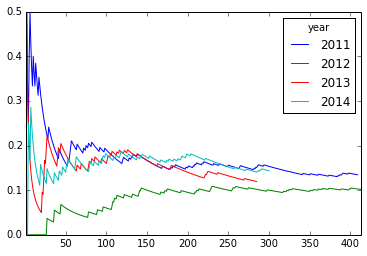

In [35]:
explore.apply(df, model.precision_series, k=500, dropna=True).plot()

In [40]:
# New model
!drain --outputdir /mnt/data/nysdec/epa-ny/drain/ epa.model.steps::violation_region2_nysdec -a


epa.model.steps::violation_region2_nysdec
2016-07-13 21:12:25,399 INFO: {'train_query': 'aux.evaluation_epa', 'year': 2011, 'region': 2, 'evaluation': False, 'train_years': 5, 'outcome_expr': 'aux.violation_epa'}, {'n_estimators': 500, '__class_name__': 'sklearn.ensemble.RandomForestClassifier', 'n_jobs': -1, 'criterion': 'entropy', 'max_features': 'sqrt'}
2016-07-13 21:12:25,403 INFO: {'train_query': 'aux.evaluation_epa', 'year': 2012, 'region': 2, 'evaluation': False, 'train_years': 5, 'outcome_expr': 'aux.violation_epa'}, {'n_estimators': 500, '__class_name__': 'sklearn.ensemble.RandomForestClassifier', 'n_jobs': -1, 'criterion': 'entropy', 'max_features': 'sqrt'}
2016-07-13 21:12:25,403 INFO: {'train_query': 'aux.evaluation_epa', 'year': 2013, 'region': 2, 'evaluation': False, 'train_years': 5, 'outcome_expr': 'aux.violation_epa'}, {'n_estimators': 500, '__class_name__': 'sklearn.ensemble.RandomForestClassifier', 'n_jobs': -1, 'criterion': 'entropy', 'max_features': 'sqrt'}
2016-07

In [39]:
!y

/bin/sh: 1: y: not found
